## Dog Bites in New York City

### Data Exploration, Cleaning, and Preparation

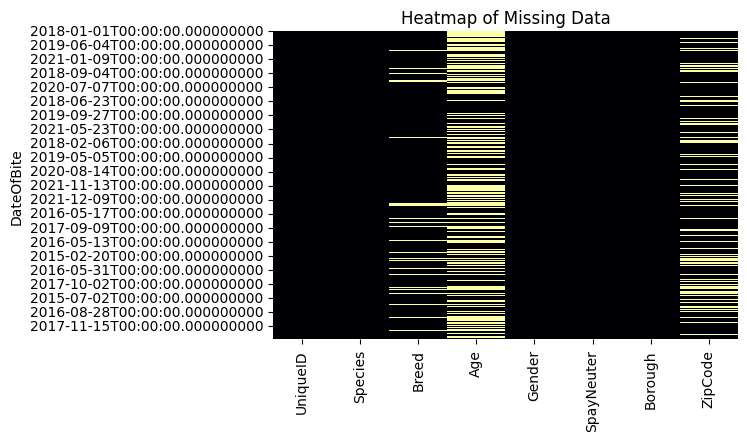

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# for formatting
headline1 = "\n----------|"
headline2 = "|----------\n"

data = pd.read_csv("Dog_Bites_Data.csv")
data['DateOfBite'] = pd.to_datetime(data['DateOfBite'])
data.set_index('DateOfBite', inplace=True)

# heatmap of missing values
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()

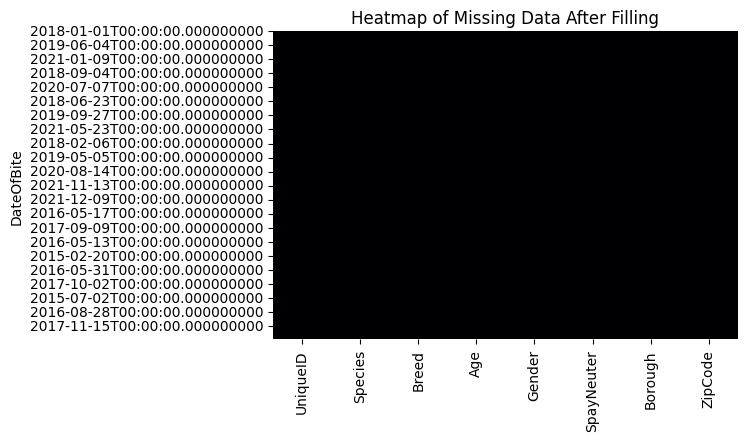

In [25]:
# fixing datatypes & filling missing values

# filling missing breeds with 'UNKNOWN'
data['Breed'] = data['Breed'].fillna('UNKNOWN')

# age to numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# fill missing age values with their median
data['Age'] = data['Age'].fillna(data['Age'].median())

# zipcode to numeric
data['ZipCode'] = pd.to_numeric(data['ZipCode'], errors='coerce')

# fill missing zip codes with 'UNKNOWN' to mirror Breed
data['ZipCode'] = data['ZipCode'].fillna('UNKNOWN')

# heatmap of missing values (after filling)
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data After Filling")
plt.show()

In [27]:
# summary statistics of dataset

# to print datatypes
print(f"{headline1} Datatypes {headline2}{data.dtypes}")

# # of rows
print(f"{headline1} Rows {headline2}{len(data.axes[0])}")

# # of columns
print(f"{headline1} Columns {headline2}{len(data.axes[1])}")

# # of missing values
print(f"{headline1} Missing Data Count {headline2}{data.isnull().sum()}")

# for loop to go through each column and display numerical statistics or categorical statistics
for column in data.columns:
    if data[column].dtype == 'int64':
        print(f"{headline1} {column} {headline2}")
        print(f"median: {data[column].median()}") # median added to .describe since it was specified in project instructions
        print(data[column].describe())
    else:
        print(f"{headline1} {column} {headline2}")
        print(data[column].value_counts())



----------| Datatypes |----------
UniqueID        int64
Species        object
Breed          object
Age           float64
Gender         object
SpayNeuter       bool
Borough        object
ZipCode        object
dtype: object

----------| Rows |----------
22663

----------| Columns |----------
8

----------| Missing Data Count |----------
UniqueID      0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

----------| UniqueID |----------

median: 5666.0
count    22663.000000
mean      5715.036668
std       3354.278369
min          1.000000
25%       2833.500000
50%       5666.000000
75%       8499.000000
max      12383.000000
Name: UniqueID, dtype: float64

----------| Species |----------

Species
DOG    22663
Name: count, dtype: int64

----------| Breed |----------

Breed
UNKNOWN                              4567
Pit Bull                             4004
Shih Tzu                              731
Chihuahua        